<a href="https://colab.research.google.com/github/Ahtesham519/jupyter-notebook_python/blob/main/Test_10_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## :anamoly **Detection**

In [14]:
!pip install nose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
#Usefult to beautifuy
from IPython.display import HTML,display
import tabulate
def pp(a, show_head = True):

  if a.ndim <2:
    a = [a]
  if show_head:
    display(HTML(tabulate.tabulate(a[:5], tablefmt='html')))
    return
  display(HTML(tabulate.tabulate(a, tablefmt ='html')))


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_moons , make_blobs
from sklearn import svm
from sklearn.ensemble import IsolationForest
import nose.tools as test_ 

In [17]:
#Global variables . Make sure you understand what eachvar means
n_samples = 1000
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

Question 1

In [18]:
center_1_coordinates = [0,2] 
center_2_coordinates = [2,2]
cluster_std_ = 0.4
rs= 42
n_samples_ = n_inliers

def generate_guassian_clusters_datasets(centers_coords , cluster_std_ , rs, n_samples_):
  ### Begin tests
  center_1_coordinates, center_2_coordinates = centers_coords[0] , centers_coords[1]
  data = make_blobs(centers = [center_1_coordinates , center_2_coordinates] , cluster_std= cluster_std_ , random_state=rs , n_samples = n_inliers)

  return data
  ### End tests


In [20]:
all_centers_locations = [([0,0] ,[2,2]) , ([2,0],[2,2]) , ([0,0],[0,0])]
data_sets= []
for center_location in all_centers_locations:
  data_sets.append(generate_guassian_clusters_datasets(centers_coords=center_location, cluster_std_ = .5 , rs= 42 , n_samples_ = n_samples))

test_.eq_(len(data_sets), 3)
test_.ok_(np.isclose(data_sets[0][0][:5] ,  np.asarray([[1.5518593 , 2.47038559], 
                                                       [0.03868415 ,-0.4306421],
                                                       [-0.18048308, 0.5796649],
                                                       [0.04352353, 0.14950368],
                                                       [2.16067861 , 2.21096038]])).all())

test_.ok_(((data_sets[0][1][:5]) == np.asarray([1,0,0,0,1])).all())

AssertionError: ignored

Generate three datasets

In [21]:
all_centers_locations = [([0,0], [2,2]) , ([2,0] , [2,2]) , ([0,0],[0,0])]
data_sets = []
for center_location in all_centers_locations:
  data_sets.append(generate_guassian_clusters_datasets(centers_coords=center_location, cluster_std_ =.5 ,rs=42, n_samples_= n_samples))


Observe the three datasets. Think about the anamolus locations

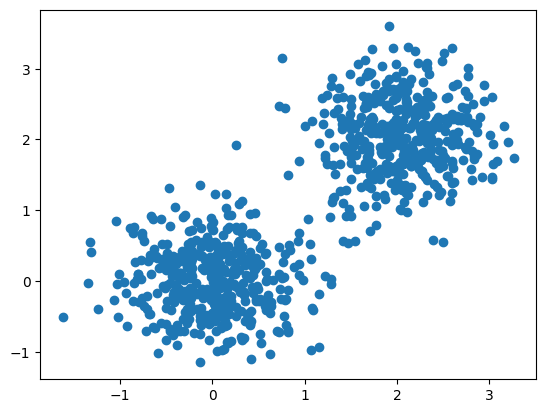

In [22]:
X1 = data_sets[0][0]
plt.scatter(X1[:,0] , X1[:, 1])

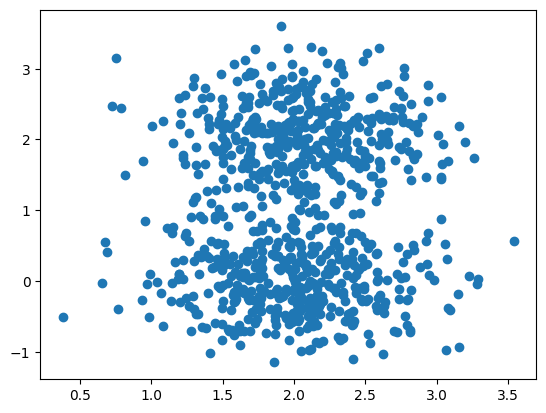

In [23]:
X2 = data_sets[1][0]
plt.scatter(X2[:, 0] , X2[:,1])

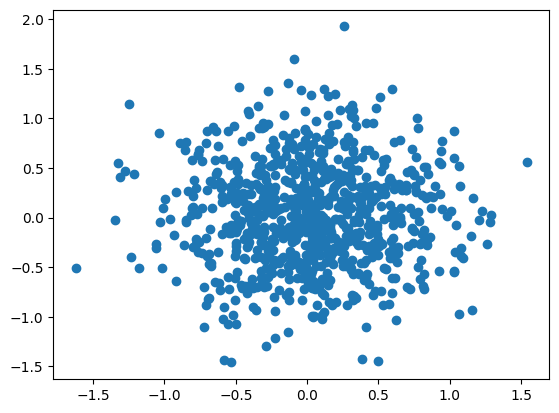

In [24]:
X3 = data_sets[2][0]
plt.scatter(X3[:,0] , X3[:,1])

Question 2

In [25]:
def plot_decision_boundary_after_training_clf(X, dataset_id , with_outliers = False, _outliers_fraction = outliers_fraction , rs = 42, clf_id = 1):
  if clf_id ==1 :
    clf = svm.OneClassSVM(nu = _outliers_fraction , kernel = "rbf",) 
  else:
    clf = IsolationForest(contamination = _outliers_fraction , random_state =rs)

  ### Begin Solution
  clf.fit(X)
  y_pred = clf.fit(X).predict(X)

  coordinates_vector1 = np.linspace(-7, 7 , 150)
  coordinates_vector2 = np.linspace(-7 , 7, 150)
  xx , yy = np.meshgrid(coordinates_vector1, coordinates_vector2)

  Z = clf.predict(np.c_[xx.ravel() , yy.ravel()])       #ravel - flatten the array- 10
  Z = Z.reshape(xx.shape)
  plt.contour(xx , yy , Z , levels=[0] , linewidths = 2 , colors = 'black')

  colors = np.array(['black' , 'orange'])
  feat1 = X[:,0]
  feat2 = X[:, 1]
  plt.scatter(feat1 , feat2 , s=10 , color = colors[(y_pred +1 ) // 2]) 
  x_min = feat1.min()
  x_max = feat1.max()
  plt.xlim(x_min-1 , x_max+1)
  
  y_min = feat2.min()
  y_max = feat2.max()
  plt.ylim(y_min-1, y_max+1)
  plt.xticks(())
  plt.yticks(())

  if clf_id == 1:
    if with_outliers:
      plt.title('Decision Boundary for datasets %d (with Outliers ) with One class SVM ' % (dataset_id))
    else:
      plt.title('Decision Boundary for datasets %d with One class SVM' % (dataset_id))
  else:
    if with_outliers:
       plt.title('Decision Boundary for dataset %d (with Outliers) with Random Forest' % (dataset_id))
    else: 
       plt.title('Decision Boundary for dataset %d with Random Forest' %d (dataset_id))
    return y_pred
  ### End solution




TypeError: ignored

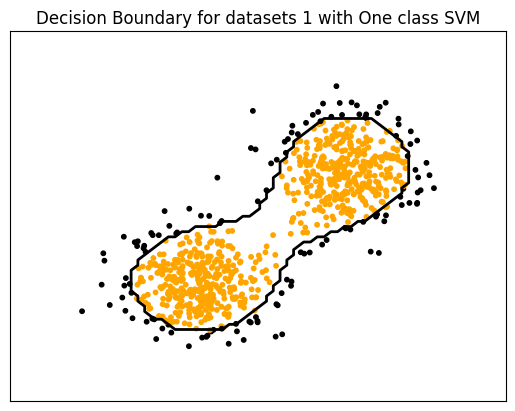

In [26]:
y_pred = plot_decision_boundary_after_training_clf (X1 , dataset_id = 1)
test_.eq_(len(y_pred) , 850)

### Begin tests
test_.ok_((y_pred[10:30] == np.array(
    [
        1,-1,1,1,1,1,1,
     -1,1,1,1,1,1,1,
     1,1,1,-1,1,1,
    ]
)).all())

#save a reference to the orignal function , then delete it form the global namsespace
old_f = plt.scatter
del plt.scatter

#try running the students code
try:
  plot_decision_boundary_after_training_clf(X1 , dataset_id = 1)
except:
  pass
else:
  raise AssertionError("plot_decesion_boundary_after_training_clf does not call the required fun1 ")

  #restore the origional function
finally:
  plt.scatter = old_f
  del old_f


#####################################
old_f = np.meshgrid
del np.meshgrid

#try running the student code 
try:
  plot_decision_boundary_after_training_clf(X1, dataset_id = 1)

#if an NameError is thrown , that means their function calls mse
except NameError:
  pass

else:
  raise AssertionError("plot_decision_boundary_after_training_clf does not call the required fun1")

#restore the orignal function
finally:
  plt.title =old_f
  del old_f

### End tests

In [ ]:
_ = plot_decision_boundary_after_training_clf(X1 , dataset_id = 1)

In [ ]:
_ = plot_decision_boundary_after_training_clf(X2 , dataset_id = 2)

In [ ]:
_ = plot_decision_boundary_after_training_clf(X3 , dataset_id = 3)

Question 3

In [27]:
def pollute_dataset(datasets_, rs , n_outliers , low_ , high_):   #add outliers
  polluted_data_sets = []

  ### Begin tests
  rng = np.random.RandomState(rs)
  for dataset in datasets_:
    x = dataset[0]
    x = np.concatenate([X,rng.uniform(low = low_, high = high_ , size = (n_outliers , 2))] ,axis = 0)
    Y = dataset[1]  #return as it is
    polluted_data_sets.append((X,Y))
    ### End solution
    return polluted_data_sets

In [28]:
polluted_datasets = pollute_dataset(data_sets , 42 , n_outliers , -5 , 4)
test_.ok_(len(polluted_datasets) , 3)
test_.ok_((np.isclose (polluted_datasets[0][0][:3] , np.asarray(
    [[1.50518593 , 2.47038559] , 
     [0.03868415 , -0.4306421],
     [-0.18048308 , 0.5796649]]
))).all())


NameError: ignored

In [29]:
polluted_datasets = polluts_dataset(data_sets, 42 , n_outliers, -5 , 4)


NameError: ignored

Question 4 

In [30]:
def plot_datasets_with_outliers(polluted_datasets , fig_size = (5,10) ,):
  ### Begin test 
  plt.figure(figsize= fig_size)
  for idx in range(1 , len(polluted_datasets) + 1):

    x_polluted = polluted_datasets[0][0]
    plt.subplot(3, 1, idx)
    plt.scatter(X_polluted[:, 0] , X_polluted[:, 1])
    plt.title('Dataset %d with ooutliers' % (idx))
  plt.show()

  ### End solution


In [31]:
#All test cases hidden tests
old_f = plt.subplot
del plt.subplot

#try running the student code 
try:
  plot_datasets_with_outliers(X1 , dataset_id =1)

#if a NameError is thrown , that menas their function calls mse
except NameError:
  pass
except :
  pass

else:
  raise AssertionError("plot_decision_boundary_after_training_clf does not call the required fun1")

#restore the origional function
finally:
  plt.subplot = old_f
  del old_f
### end hiddden test


In [33]:
plot_datasets_with_outliers(polluted_datasets)

NameError: ignored

In [34]:
X1_pol = polluted_datasets[0][0]
_= plot_decision_boundary_after_training_clf(clf_id =1 , X=X1_pol , dataset_id = 1 , with_outliers = True)

NameError: ignored

In [35]:
X2_pol = polluted_datasets[1][0]
_= plot_decision_boundary_after_training_clf(clf_id = 1 , X= X2_pol , dataset_id = 2)

NameError: ignored

In [36]:
X3_pol = polluted_datasets[2][0]
_ = plot_decision_boundary_after_training_clf(X = X3_pol , clf_id = 1, dataset_id =3)

NameError: ignored

Isolation Forest

NameError: ignored

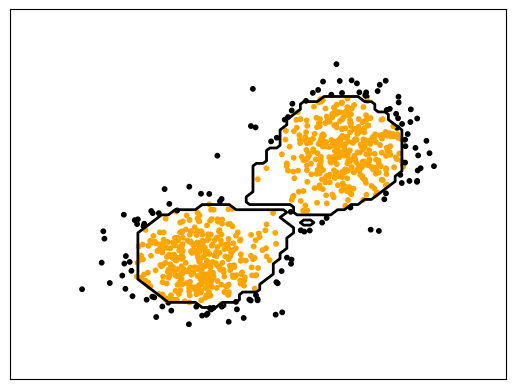

In [37]:
X1 = data_sets[0][0]
_= plot_decision_boundary_after_training_clf(clf_id = 2 , X =X1 , dataset_id = 1)

NameError: ignored

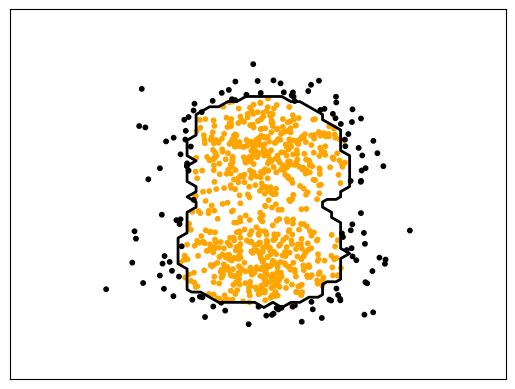

In [38]:
X2 = data_sets[1][0]
_ = plot_decision_boundary_after_training_clf(clf_id = 2 , X= X2, dataset_id = 2)

NameError: ignored

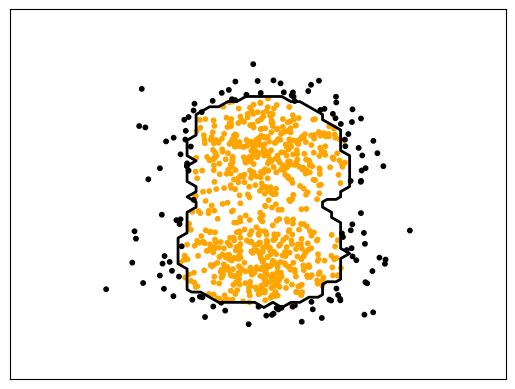

In [39]:
X3 = data_sets[1][0]
_ = plot_decision_boundary_after_training_clf(clf_id= 2 , X = X3 , dataset_id =3)

with Outliers

In [40]:
X1_pol - polluted_datasets[0][0]
_ = plot_decision_boundary_after_training_clf(clf_id = 2 , X= X1 , dataset_id= = 1 , with_outliers = True)

SyntaxError: ignored

In [43]:
X2_pol = polluted_datasets[1][0]
_ = plot_decision_boundary_after_training_clf(clf_id=2 , X= X2 , dataset_id = 2 , with_outliers = True)

NameError: ignored

In [42]:
X3_pol = olluted_datasets[2][0]
_= plot_decision_boundary_after_training_clf(clf_id = 2, X= X3 , dataset_id= 3, with_outliers = True)

NameError: ignored